# Stores Analysis
Order of execution: 2.<br>
This script needs to be run after the MigrosChallengeDataPreparation.

In [ ]:
import pandas as pd
import matplotlib as plt

In [15]:
df_shops_plz = pd.read_csv("stores_near_zurich_merged_duplicates_removed_plz_kreis_info_FINAL.csv")

In [16]:
df_shops_plz

,Unnamed: 0,business_status,name,place_id,rating,types,user_ratings_total,geometry.location.lat,geometry.location.lng,PostalCode,...,Einwohner\nDez. 2013_PLZ,Einwohner\nDez. 2005_PLZ,Ausländer \nDez. 2018_PLZ,Stadtkreis,KreisNumber,Fläche\nin km²_Kreis,Einwohner \nDez. 2018_Kreis,Einwohner\nDez. 2013_Kreis,Einwohner\nDez. 2005_Kreis,Ausländer \nDez. 2018_Kreis
0,0,OPERATIONAL,Migros Supermarkt,ChIJR2S8OUGmmkcR8rApXQaV9Ck,4.1,"['grocery_or_supermarket', 'supermarket', 'foo...",233,47.307022,8.590433,8703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,OPERATIONAL,Migros Supermarkt,ChIJz36CXYqnmkcRPGj6agSMWlo,4.3,"['grocery_or_supermarket', 'supermarket', 'foo...",660,47.311111,8.525278,8134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,OPERATIONAL,Migros Supermarkt,ChIJa1QxRlGmmkcRkAjn_uA_XJc,4.3,"['grocery_or_supermarket', 'supermarket', 'foo...",117,47.318516,8.581976,8700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,OPERATIONAL,Coop Supermarkt Zürich Leimbach,ChIJTUhiXjIIkEcRJo4d0p5UxZg,4.2,"['supermarket', 'grocery_or_supermarket', 'foo...",140,47.326258,8.514240,8041,...,5730.0,4867.0,2124.0,Kreis 2,2.0,11.07,34877.0,30503.0,28834.0,11167.0
4,4,OPERATIONAL,Coop Pronto Shop mit Tankstelle,ChIJvRhhF4CnmkcRfikKLNDOMwo,4.0,"['gas_station', 'supermarket', 'grocery_or_sup...",306,47.327608,8.529955,8134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,OPERATIONAL,Lidl,ChIJLShbyakMkEcR_jalCAiE1Uc,4.2,"['supermarket', 'convenience_store', 'grocery_...",305,47.444310,8.465036,8105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,201,OPERATIONAL,Migros Supermarket Zurich Airport,ChIJ_SR38lZ1kEcReSR9696npIg,4.5,"['grocery_or_supermarket', 'supermarket', 'foo...",853,47.449377,8.562699,8058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,202,OPERATIONAL,Coop Pronto Zürich Flughafen,ChIJ56y3sVd1kEcRJyQJlYVxzGQ,3.9,"['supermarket', 'grocery_or_supermarket', 'foo...",46,47.450275,8.562389,8302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,203,OPERATIONAL,Lidl,ChIJUcR7g--fmkcR-eAZgZ5IL-w,4.1,"['supermarket', 'grocery_or_supermarket', 'hom...",715,47.454714,8.579219,8302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate statistics at Kreis level

In [77]:
df_shops_kreis_stats = df_shops_plz.groupby(['Stadtkreis']).agg(inhabitants = ('Einwohner \nDez. 2018_Kreis', 'mean'), shops_count = ('place_id', 'nunique'), surface = ('Fläche\nin km²_Kreis', 'mean'))

df_shops_kreis_stats['inhabitants_per_shop'] = round(df_shops_kreis_stats['inhabitants'] / df_shops_kreis_stats['shops_count'],1)
df_shops_kreis_stats['population_density [inhabitants/km2]'] = round(df_shops_kreis_stats['inhabitants'] / df_shops_kreis_stats['surface'],1)

df_shops_kreis_stats.sort_values(by = 'surface', ascending = False)

,inhabitants,shops_count,surface,inhabitants_per_shop,population_density [inhabitants/km2]
Stadtkreis,,,,,
Kreis 7,38191.0,7,15.02,5455.9,2542.7
Kreis 11,75344.0,24,13.43,3139.3,5610.1
Kreis 9,55765.0,25,12.07,2230.6,4620.1
Kreis 2,34877.0,15,11.07,2325.1,3150.6
Kreis 10,40341.0,11,9.09,3667.4,4438.0
Kreis 3,50569.0,14,8.64,3612.1,5852.9
Kreis 12,32483.0,7,5.98,4640.4,5431.9
Kreis 6,34321.0,7,5.10,4903.0,6729.6
Kreis 8,16788.0,9,4.80,1865.3,3497.5


## Plot the number of inhabitants per shop and the population density

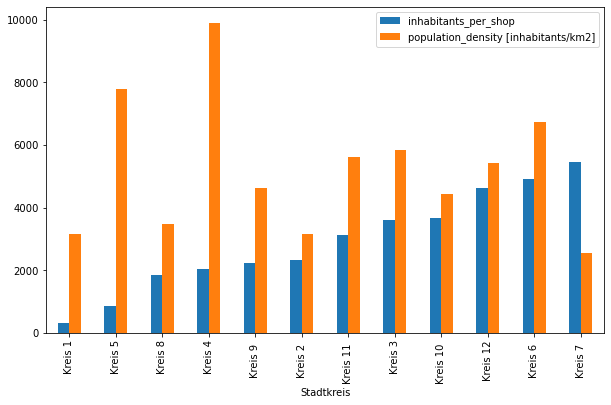

In [78]:
plt_df_shops_kreis_stats = df_shops_kreis_stats.sort_values(by = 'inhabitants_per_shop', ascending = True ).plot.bar(y = ['inhabitants_per_shop', 'population_density [inhabitants/km2]'], figsize = (10, 6))

plt_df_shops_kreis_stats.figure.savefig('plt_df_shops_kreis_stats.pdf')

## Calculate and plot the number of shops per Kreis

In [80]:
# Shops count
df_Migros_Count_per_Kreis = df_shops_plz[df_shops_plz['name'].apply(lambda x :  ('migros' in x.lower()) & ('voi' not in x.lower()))].groupby(['Stadtkreis']).agg(Migros_count = ('place_id', 'count'), Migros_stores_names = ('name', 'unique')).sort_values(by = 'Migros_count', ascending = False)
df_Migrolino_Count_per_Kreis = df_shops_plz[df_shops_plz['name'].apply(lambda x :  ('migrolino' in x.lower()) | ('voi' in x.lower()))].groupby(['Stadtkreis']).agg(Migrolino_count = ('place_id', 'count'), Migrolino_stores_names = ('name', 'unique')).sort_values(by = 'Migrolino_count', ascending = False)
df_Coop_Count_per_Kreis = df_shops_plz[df_shops_plz['name'].apply(lambda x :  ('coop' in x.lower()) & ('pronto' not in x.lower()))].groupby(['Stadtkreis']).agg(Coop_count = ('place_id', 'count'), Coop_stores_names = ('name', 'unique')).sort_values(by = 'Coop_count', ascending = False)
df_Coop_Pronto_Count_per_Kreis = df_shops_plz[df_shops_plz['name'].apply(lambda x :  ('coop pronto' in x.lower()))].groupby(['Stadtkreis']).agg(Coop_Pronto_count = ('place_id', 'count'), Coop_Pronto_stores_names = ('name', 'unique')).sort_values(by = 'Coop_Pronto_count', ascending = False)
df_Others_Count_per_Kreis = df_shops_plz[df_shops_plz['name'].apply(lambda x :  ('coop' not in x.lower()) & ('migros' not in x.lower()) & ('voi' not in x.lower()))].groupby(['Stadtkreis']).agg(Others_count = ('place_id', 'count'), Others_stores_names = ('name', 'unique')).sort_values(by = 'Others_count', ascending = False)

# Combined - full outer join
df_Stores_Count_per_Kreis = pd.concat([df_Migros_Count_per_Kreis, df_Migrolino_Count_per_Kreis, df_Coop_Count_per_Kreis, df_Coop_Pronto_Count_per_Kreis, df_Others_Count_per_Kreis], axis = 1, join = 'outer')
df_Stores_Count_per_Kreis

# Show the shops counts
df_Stores_Count_per_Kreis[['Migros_count', 'Migrolino_count', 'Coop_count', 'Coop_Pronto_count', 'Others_count']]

,Migros_count,Migrolino_count,Coop_count,Coop_Pronto_count,Others_count
Kreis 5,8,1.0,6,1.0,3.0
Kreis 1,5,2.0,8,2.0,3.0
Kreis 2,5,3.0,5,1.0,3.0
Kreis 9,5,5.0,9,4.0,5.0
Kreis 3,4,2.0,7,NaN,3.0
Kreis 4,4,3.0,3,4.0,3.0
Kreis 8,4,1.0,4,NaN,1.0
Kreis 11,3,3.0,9,4.0,8.0
Kreis 6,3,NaN,3,1.0,NaN
Kreis 10,2,1.0,6,1.0,1.0


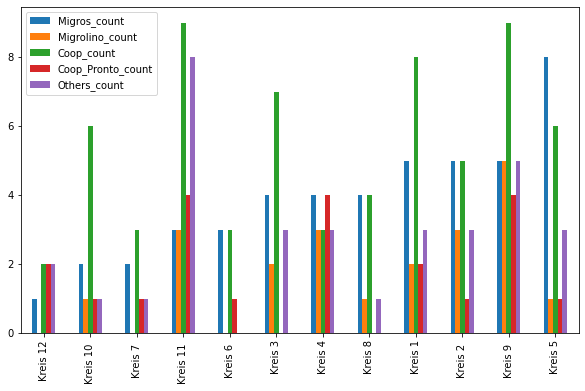

In [65]:
plt_Stores_Count_per_Kreis = df_Stores_Count_per_Kreis[['Migros_count', 'Migrolino_count', 'Coop_count', 'Coop_Pronto_count', 'Others_count']].sort_values('Migros_count').plot.bar(figsize = (10, 6))

plt_Stores_Count_per_Kreis.figure.savefig('plt_Stores_Count_per_Kreis.pdf')

## Plot the number of Migros shops per Kreis

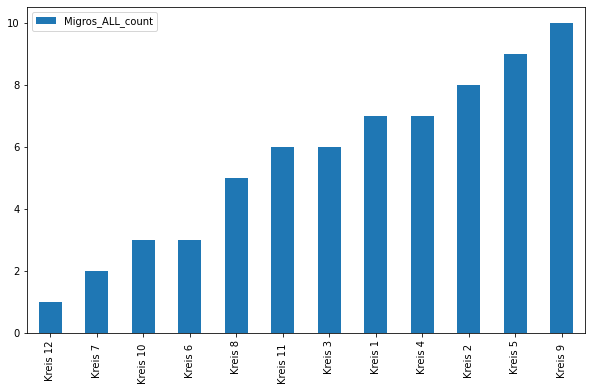

In [74]:
# Shops count
df_Migros_ALL_Count_per_Kreis = df_shops_plz[df_shops_plz['name'].apply(lambda x :  ('migro' in x.lower()) | ('voi' in x.lower()))].groupby(['Stadtkreis']).agg(Migros_ALL_count = ('place_id', 'count'), Migros_ALL_stores_names = ('name', 'unique')).sort_values(by = 'Migros_ALL_count', ascending = False)

# Combined - full outer join
df_Migros_Stores_Count_vs_Stats = pd.concat([df_Migros_ALL_Count_per_Kreis, df_shops_plz_shops_density], axis = 1, join = 'outer')
df_Migros_Stores_Count_vs_Stats


#df_Migros_Stores_Count_vs_Stats[['Migros_count', 'Migrolino_count']]

plt_Migros_Stores_Count_vs_Stats = df_Migros_Stores_Count_vs_Stats.sort_values(by = 'Migros_ALL_count', ascending = True ).plot.bar(y = ['Migros_ALL_count'], figsize = (10, 6))
#plt_Migros_Stores_Count_vs_Stats = df_Migros_Stores_Count_vs_Stats.sort_values(by = 'inhabitants_per_shop', ascending = True ).plot.bar(y = ['Migros_ALL_count', 'inhabitants_per_shop', 'population_density [inhabitants/km2]'], figsize = (10, 6))

plt_Migros_Stores_Count_vs_Stats.figure.savefig('plt_Migros_Stores_Count_vs_Stats.pdf')

## Plot the shops stats and pop density in one chart
This could be achieved by using a secondary axis for the field "Migros_ALL_count"

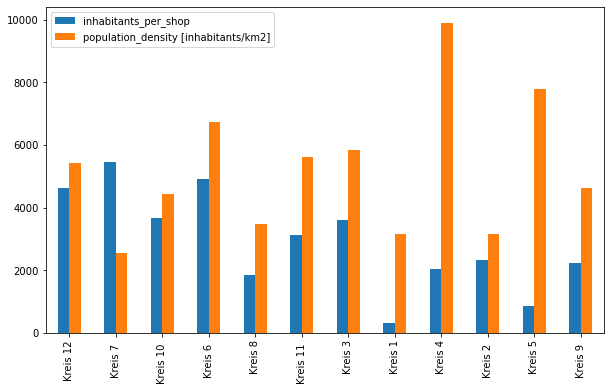

In [83]:
plt_Migros_Stores_Count_vs_Stats_ORDERED = df_Migros_Stores_Count_vs_Stats.sort_values(by = 'Migros_ALL_count', ascending = True ).plot.bar(y = ['inhabitants_per_shop', 'population_density [inhabitants/km2]'], figsize = (10, 6))
#plt_Migros_Stores_Count_vs_Stats = df_Migros_Stores_Count_vs_Stats.sort_values(by = 'inhabitants_per_shop', ascending = True ).plot.bar(y = ['Migros_ALL_count', 'inhabitants_per_shop', 'population_density [inhabitants/km2]'], figsize = (10, 6))

plt_Migros_Stores_Count_vs_Stats_ORDERED.figure.savefig('plt_Migros_Stores_Count_vs_Stats_ORDERED.pdf')